<a href="https://colab.research.google.com/github/krag-harsh/pytorch/blob/master/2_4_pytorch_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [12]:
# class for ploting  

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [13]:
from torch.utils.data import Dataset, DataLoader

# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

# Create dataset object

dataset = Data()

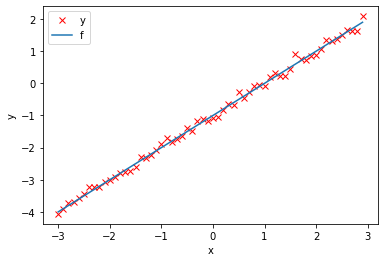

In [14]:
# Plot the data

plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<h2 id="Model_Cost">Create the Model and Total Loss Function (Cost)</h2>

[optim documentation link](https://pytorch.org/docs/stable/optim.html)

[MSEloss function documentatoin link](https://pytorch.org/docs/master/generated/torch.nn.MSELoss.html)

In [15]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [16]:
# We will use PyTorch build-in functions to create a criterion function; this calculates the total loss or cost 
# Build in cost function
criterion = nn.MSELoss()

# Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.
# Create optimizer
model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)    #Implements stochastic gradient descent #here lr is learning rate

# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)       #change batch_size according to your requirements

PyTorch randomly initialises your model parameters. If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialise the parameters such that they will take longer to converge, i.e. look cool  

In [17]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [18]:
# Create plot surface object
#just to visualise
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [19]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist()) 
            optimizer.zero_grad()   #Clears the gradients of all optimized torch.Tensors
            loss.backward()
            optimizer.step()      # updates the parameters
        get_surface.plot_ps()



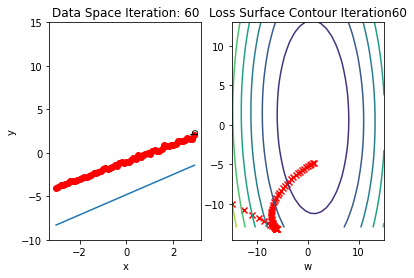

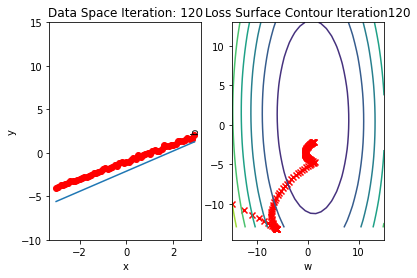

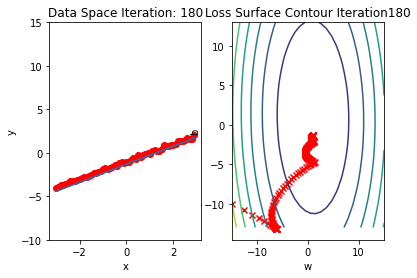

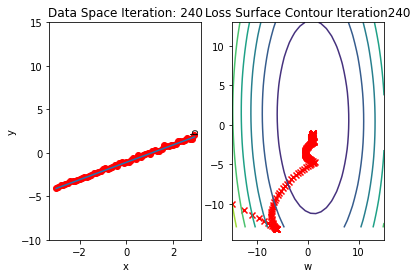

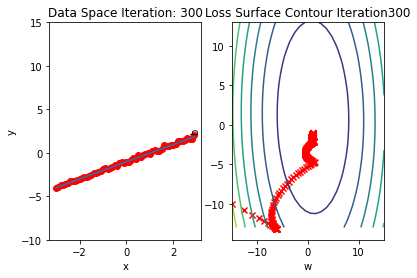

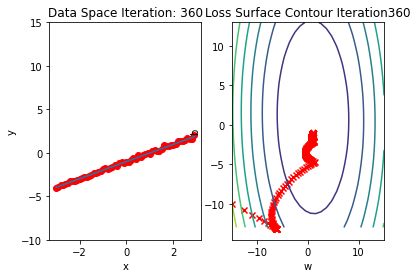

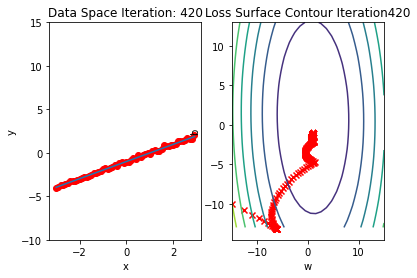

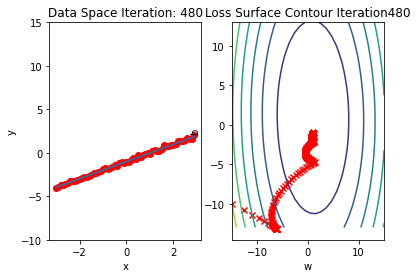

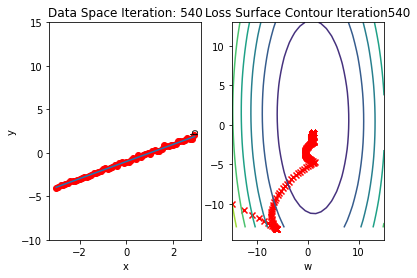

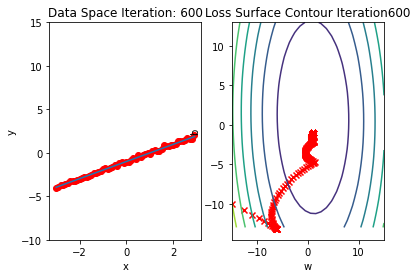

In [20]:
train_model_BGD(10)